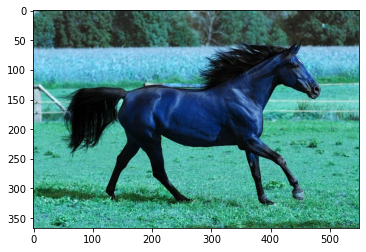

In [5]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('Cheval.jpg')

(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 7)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('Cheval7.jpg', quant)
plt.imshow(image)

cv2.imread('Cheval.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#clustering permet de créer des groupes a partir d'un ensemble de données tels que : 
#les données qui appartiennent au meme groupe sont similaires
#donc on va appliquer l'argorithme de k-means: pour segmenter l'image cad On divise l'image en des régions homogéne



##### <font color=green>*=> Lorsque  on augmente les nombres des clusteurs (on applique dans cette exemple nombe de cluster=2 ou  3 ou 5 ou 6, plus l' image approche à l'image original "cheval.jpg"*</font>

In [3]:
!pip install opencv-python

In [ ]:
#on ajoute  le  bruit a notre image gaussian,localvar,poisson,salt,pepper,s&p,speckle

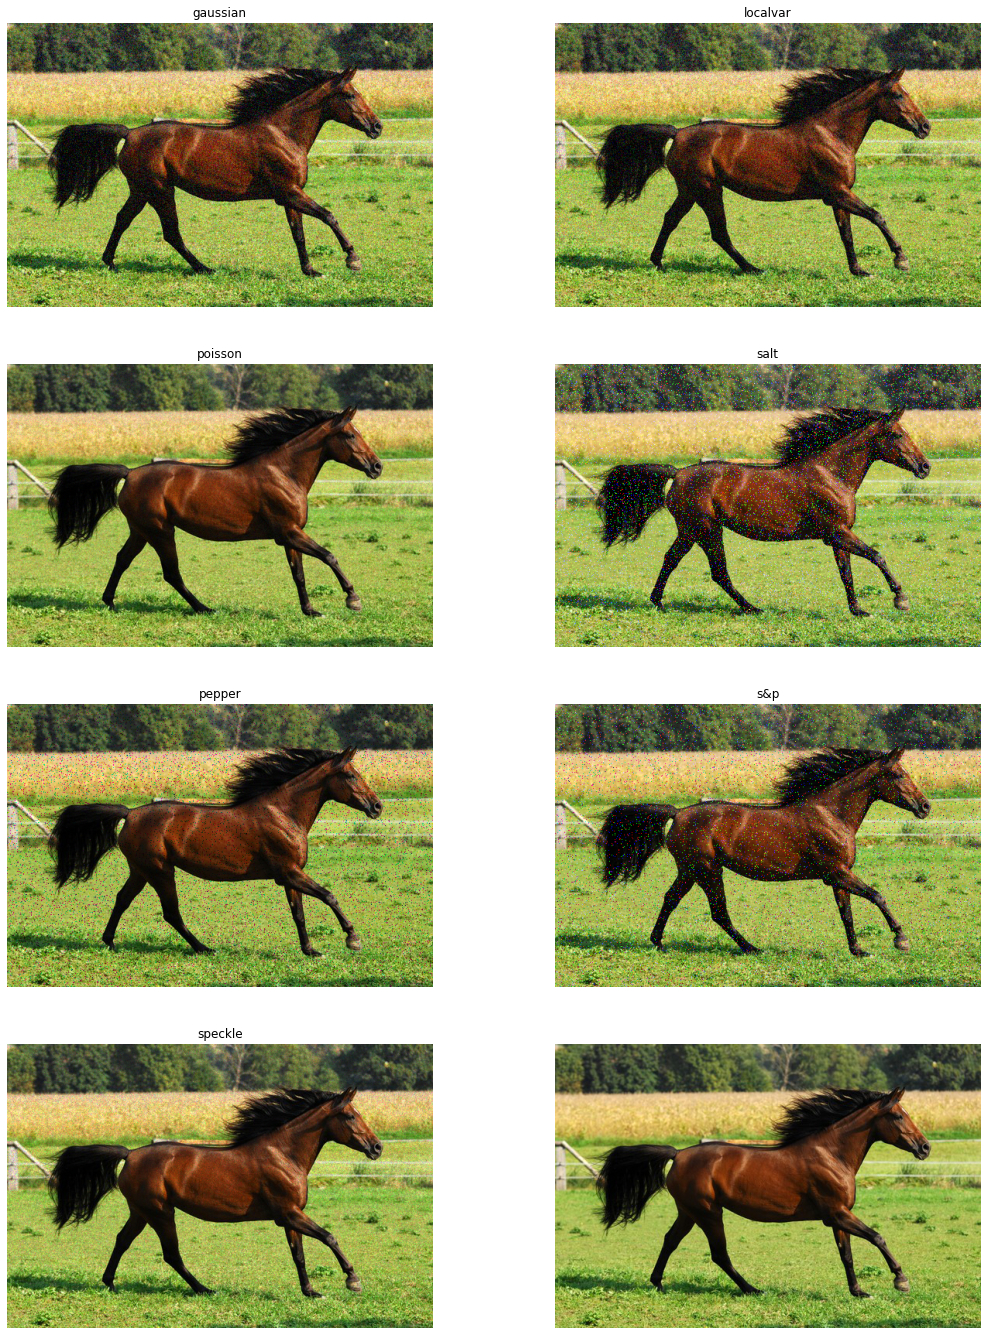

In [6]:
import skimage.io
import matplotlib.pyplot as plt
img_path="Cheval.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


In [ ]:
#Autre methode pour afficher l'image original

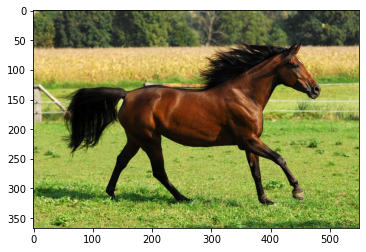

In [7]:
def PreprocessContentImage(img, long_edge):
 

    
    img = io.imread(img)
    logging.info("load the content image, size = %s", img.shape[:2])
    factor = float(long_edge) / max(img.shape[:2])
    new_size = (int(img.shape[0] * factor), int(img.shape[1] * factor))
    resized_img = transform.resize(img, new_size)
    sample = np.asarray(resized_img) * 256
    # swap axes to make image from (224, 224, 3) to (3, 224, 224)
    sample = np.swapaxes(sample, 0, 2)
    sample = np.swapaxes(sample, 1, 2)
    # sub mean
    sample[0, :] -= 123.68
    sample[1, :] -= 116.779
    sample[2, :] -= 103.939
    logging.info("resize the content image to %s", new_size)
    return np.resize(sample, (1, 3, sample.shape[1], sample.shape[2])) 
plt.imshow(img)

In [ ]:
#choisir l'image 4 "salt " avec bruit 
# enregistrer  cette image dans  "result.png"

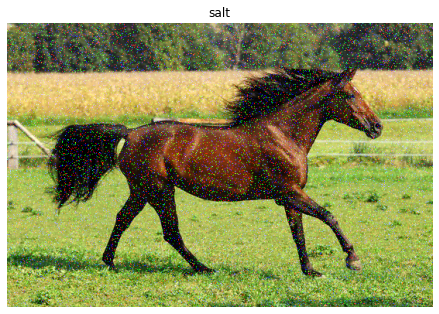

In [8]:
import skimage.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
img_path="Cheval.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        mpimg.imsave("result.png",  gimg)
        
  
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2

plotnoise(img, "salt", r,c,4)

plt.show()



In [ ]:
#puis On appliquer les clusters sur cette image bruité avec cluster=2 
#et le resultat se trouve dans "result2.png"  pour apprendre la différence 

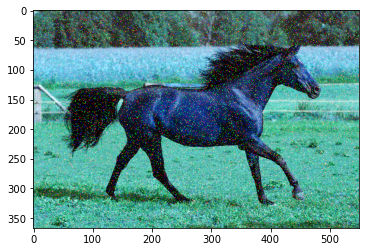

In [9]:

import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('result.png')

(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('result2.png', quant)
plt.imshow(image)

cv2.imread('result.png')
cv2.waitKey(0)
cv2.destroyAllWindows()

#### <font color=red>=>On remarque que lorsque on fait un clustering sur des données non bruité puis on ajoute un signal bruit est important et faire le meme clustering =>il y'a un difference on remarque que le performance d' algorithmen  se degrade et que que l'image avec bruit est tres clair que l'autre image auquel nous avons appliqué le bruit etl'alogorithme de  k-means </font>

In [ ]:
#On va faire un algorithme  qui elimine le bruit puis on va applique l'algorithme  de clustering pour voir  le résultat

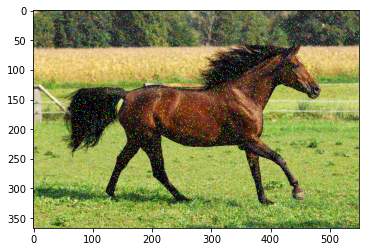

In [17]:
import numpy as np
from scipy import ndimage

def scfilter(img, iterations, kernel):
       """
       Sine‐cosine filter.
       kernel can be tuple or single value.
       Returns filtered image.
       """
       for n in range(iterations):
        img = skimage.io.imread("result.png")(
           ndimage.filters.uniform_filter(np.sin(img), size=kernel),
           ndimage.filters.uniform_filter(np.cos(ima), size=kernel))
       return img
plt.imshow(img)
plt.imsave("imaelibruit3.jpg",salt_img)

In [ ]:
#ON remarque que le bruit ne peut jamais eliminer car il est ordinaire 
#cad on vas encore d'affaiblir le bruit mais ne pas tous eliminer
#et  des zones fragmentées

In [ ]:
##autre methode d'elimination le bruit dans l'image de gaussian et salt 

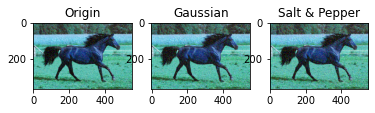

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.util import random_noise

I = cv2.imread('result.png', 1); # 1/ -1: color mode; 0: gray mode
gauss = random_noise(I, mode='gaussian', seed=None, clip=True)
sp = random_noise(I, mode='s&p', seed=None, clip=True)

plt.subplot(231), plt.imshow(I), plt.title('Origin')
plt.subplot(232), plt.imshow(gauss), plt.title('Gaussian')
plt.subplot(233), plt.imshow(sp), plt.title('Salt & Pepper')
plt.show();
plt.imsave("imaelibruit4.jpg",gauss)
plt.imsave("imaelibruit5.jpg",sp)

In [ ]:
#autre methode d elimination de bruit

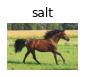

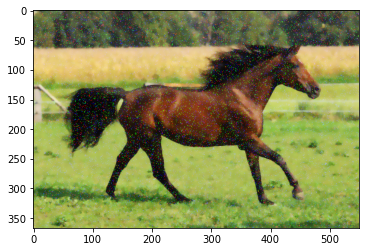

In [18]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
# Apply total variation filter denoising
img_path="result.jpg"

plotnoise(img, "salt", r,c,3)
plt.show()
noise = denoise_tv_chambolle(img,
weight=0.1,
multichannel=True)
# Show denoised image
#plt.imshow(img)
plt.imshow(noise)
plt.imsave("imaelibruit6.jpg",noise)

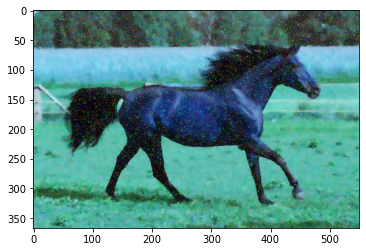

In [19]:
image = cv2.imread('imaelibruit6.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('imaelibruit2.jpg', quant)
plt.imshow(image)

cv2.imread('imaelibruit.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()